In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


#### Build dataset

In [2]:
def build_toy_dataset(N, noise_std=0.1):
    X = np.random.uniform(-10, 10, size=[N, 2]).astype(np.float32)
    y = 2*X[:, 0] - X[:, 1] + np.random.normal(5, 0.3, size=N).astype(np.float32)
    y[y < 0.0] = 0
    y[y > 0.0] = 1
    return X, y.reshape(N, 1)

N = 300  # number of data points
# DATA
np.random.seed(42)
X_train, y_train = build_toy_dataset(N)

No handles with labels found to put in legend.


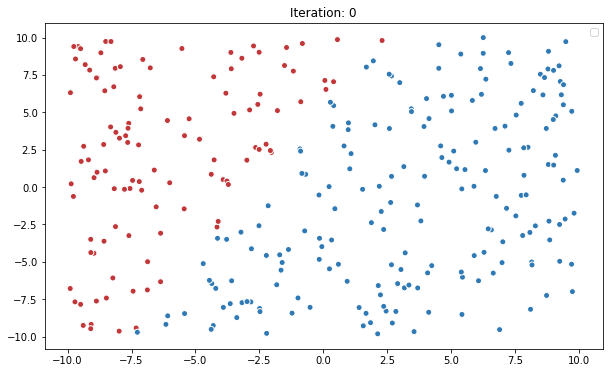

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title("Iteration: 0")

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(N), cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")

ax.legend()
plt.show()

# grid for countour map
xx1, xx2 = np.mgrid[-10:10:.1, -10:10:.1]
grid = np.c_[xx1.ravel().astype(np.float32), xx2.ravel().astype(np.float32)]
#grid = tf.constant(grid, dtype=tf.float32)

#### Logistic models

In [4]:
W = tf.Variable(tf.ones(shape=[2, 1]), name="weights")
b = tf.Variable(tf.zeros(shape=[1]), name="bias")

def linear_model(X):
    
    logits = tf.add(tf.matmul(X, W), b)
    probs = tf.sigmoid(logits)
    
    return logits

def loss_function(labels, logits):
    
    sum_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    loss = tf.reduce_mean(sum_loss)
    
    return loss

#### Training

In [5]:
optimizer = tf.optimizers.Adam(0.01)


for i in range(2000):
    
    with tf.GradientTape() as t:
        current_loss = loss_function(y_train, linear_model(X_train))
    grads = t.gradient(current_loss, [W, b])
    
    optimizer.apply_gradients(zip(grads,[W, b]))
    

print("After 2000 iterations loss %.2f" % current_loss)
final_model = linear_model(grid).numpy()

After 2000 iterations loss 0.03


#### Final model visualization

No handles with labels found to put in legend.


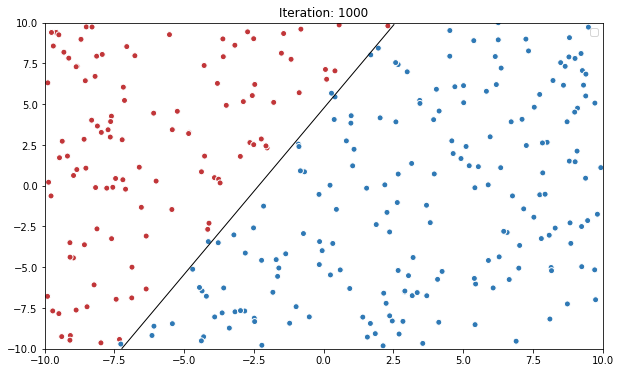

In [6]:
# FIRST VISUALIZATION (prior)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title("Iteration: 1000")

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(N), cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")

ax.contour(xx1, xx2, final_model.reshape(200,200), levels=[.5], cmap="Greys", vmin=0, vmax=.1, linewidths=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.legend()
plt.show()